## Kapitel 7 

1. I denna uppgift ska vi använda MNIST-datan som vi arbetat med tidigare. Detta för att ha ett bekant dataset att arbeta med och experimentera med ANN-modeller.

a) Träna en ANN-modell på MNIST-datan. Vad får du för resultat?

- Steg 1 ladda och förstå datan

- Läs in dataset:

In [2]:
from tensorflow import keras

mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


- Visa shapes

In [3]:
print("X_train:", X_train.shape) 
print("y_train:", y_train.shape) 
print("X_test:", X_test.shape) 
("y_test:", y_test.shape)

X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)


('y_test:', (10000,))

- Visa några exempel

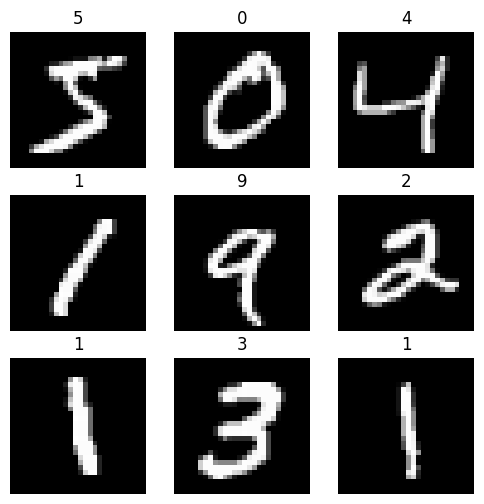

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(y_train[i])
    plt.axis("off")
plt.show()


. Steg 2 förbehandling av data

. Normalisera pixelvärden (0–255 → 0–1)

In [5]:
X_train_norm = X_train / 255.0 
X_test_norm = X_test / 255.0

. Platta ut bilderna (28x28 → 784)

In [6]:
X_train_flat = X_train_norm.reshape(len(X_train_norm), 28*28)
X_test_flat = X_test_norm.reshape(len(X_test_norm), 28*28)

. Kontrollera formerna

In [7]:
print("X_train_flat:", X_train_flat.shape) 
print("X_test_flat:", X_test_flat.shape) 
print("y_train:", y_train.shape) 
print("y_test:", y_test.shape)

X_train_flat: (60000, 784)
X_test_flat: (10000, 784)
y_train: (60000,)
y_test: (10000,)


. Steg 3 baseline ANN

- Definiera modellen

In [8]:
from tensorflow.keras import layers

model_baseline = keras.Sequential([
    keras.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

- Kompilera modellen

In [9]:
model_baseline.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

- Träna modellen

In [10]:
history_baseline = model_baseline.fit(
    X_train_flat, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9218 - loss: 0.2708 - val_accuracy: 0.9658 - val_loss: 0.1164
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9636 - loss: 0.1216 - val_accuracy: 0.9730 - val_loss: 0.0887
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9754 - loss: 0.0833 - val_accuracy: 0.9772 - val_loss: 0.0781
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9814 - loss: 0.0614 - val_accuracy: 0.9753 - val_loss: 0.0740
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9853 - loss: 0.0470 - val_accuracy: 0.9780 - val_loss: 0.0778


- Accuracy‑kurva (train vs val)

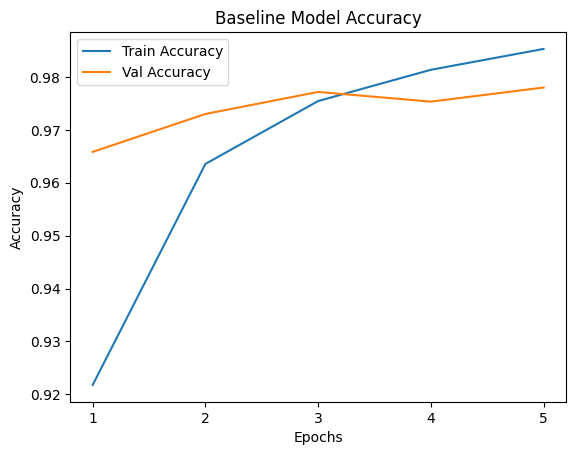

In [11]:
plt.plot(history_baseline.history['accuracy'], label='Train Accuracy')
plt.plot(history_baseline.history['val_accuracy'], label='Val Accuracy')     
plt.title('Baseline Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(5), [1, 2, 3, 4, 5])
plt.legend()
plt.show()

- Loss‑kurva (train vs val)

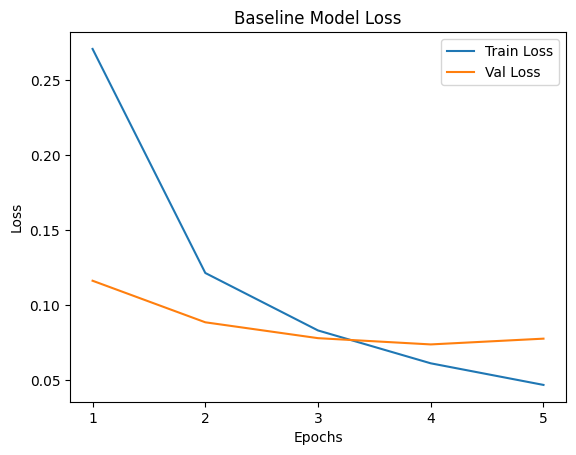

In [12]:
plt.plot(history_baseline.history['loss'], label='Train Loss')
plt.plot(history_baseline.history['val_loss'], label='Val Loss')     
plt.title('Baseline Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(5), [1, 2, 3, 4, 5])
plt.legend()
plt.show()  

- Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step


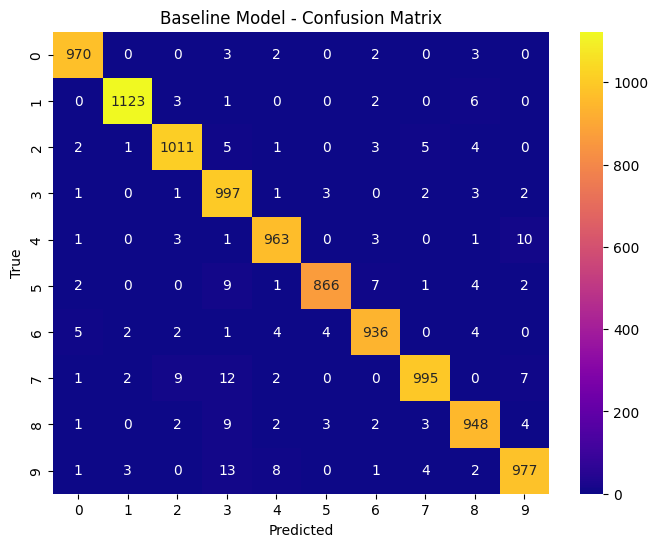

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_baseline = model_baseline.predict(X_test_flat).argmax(axis=1)
cm_baseline = confusion_matrix(y_test, y_pred_baseline)

plt.figure(figsize=(8,6))
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='plasma')
plt.title('Baseline Model - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

- Utvärdera modellen

In [14]:
test_baseline_loss, test_baseline_acc = model_baseline.evaluate(X_test_flat, y_test, verbose=0)
print("Baseline test accuracy:", test_baseline_acc)

Baseline test accuracy: 0.978600025177002


- Steg 4 Avancerad ANN

In [15]:
model_advanced = keras.Sequential([
    keras.Input(shape=(784,)),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(10, activation='softmax')
])

- Kompilera modellen

In [17]:
model_advanced.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

- Träna modellen

In [18]:
history_advanced = model_advanced.fit(
    X_train_flat, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8863 - loss: 0.3750 - val_accuracy: 0.9658 - val_loss: 0.1112
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9356 - loss: 0.2082 - val_accuracy: 0.9708 - val_loss: 0.1017
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9466 - loss: 0.1747 - val_accuracy: 0.9770 - val_loss: 0.0783
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9534 - loss: 0.1528 - val_accuracy: 0.9792 - val_loss: 0.0698
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9587 - loss: 0.1353 - val_accuracy: 0.9793 - val_loss: 0.0690
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9606 - loss: 0.1278 - val_accuracy: 0.9800 - val_loss: 0.0708
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9639 - loss: 0.1157 - val_accuracy: 0.9802 - val_loss: 0.0691
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9652 - loss: 0.1099 - 

- Accuracy‑kurva (train vs val)

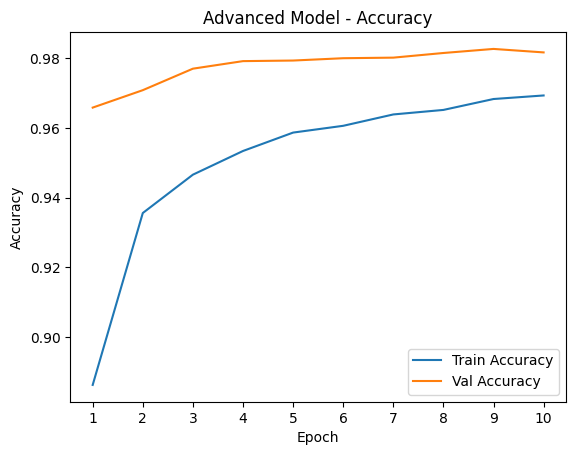

In [19]:
plt.plot(history_advanced.history['accuracy'], label='Train Accuracy')
plt.plot(history_advanced.history['val_accuracy'], label='Val Accuracy')
plt.title('Advanced Model - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(10), [1,2,3,4,5,6,7,8,9,10])
plt.legend()
plt.show()

- Loss‑kurva (train vs val)

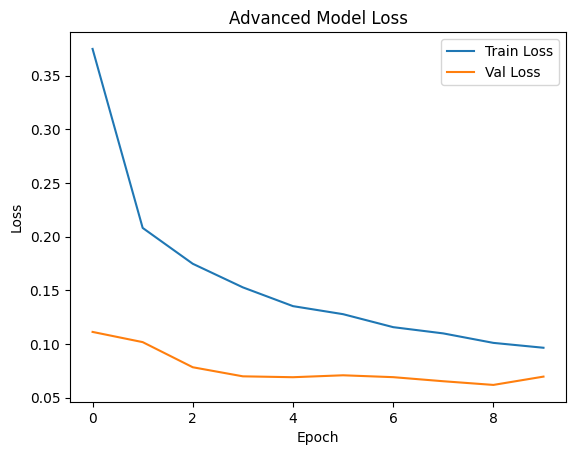

In [20]:
plt.plot(history_advanced.history['loss'], label='Train Loss')
plt.plot(history_advanced.history['val_loss'], label='Val Loss')
plt.title('Advanced Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


- Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


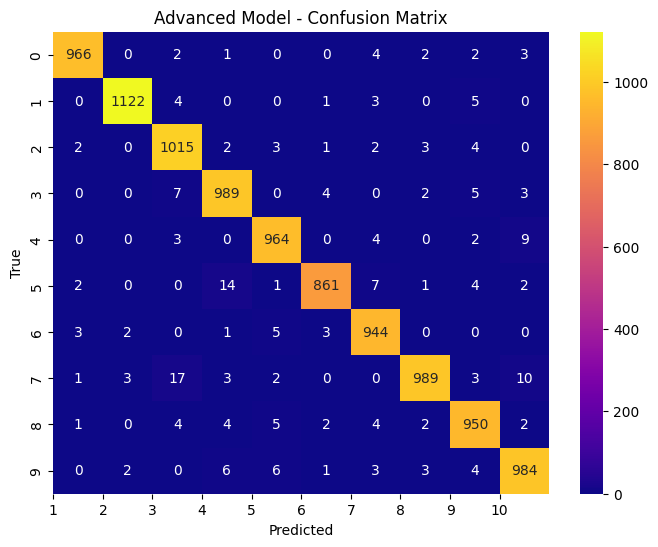

In [21]:
y_pred_advanced = model_advanced.predict(X_test_flat).argmax(axis=1)
cm_advanced = confusion_matrix(y_test, y_pred_advanced)

plt.figure(figsize=(8,6))
sns.heatmap(cm_advanced, annot=True, fmt='d', cmap='plasma')
plt.title('Advanced Model - Confusion Matrix')
plt.xlabel('Predicted')
plt.xticks(range(10), [1,2,3,4,5,6,7,8,9,10])
plt.ylabel('True')
plt.show()


- Utvärdera modellen

In [22]:
test_advanced_loss_adv, test_advanced_acc_adv = model_advanced.evaluate(X_test_flat, y_test, verbose=0)
print("Advanced model test accuracy:", test_advanced_acc_adv)

Advanced model test accuracy: 0.9783999919891357


- Jämförelse

In [23]:
# ============================
# RESULTATSAMMANSTÄLLNING
# ============================

print("=== BASELINE MODEL ===")
print("Final Train Accuracy:", history_baseline.history['accuracy'][-1])
print("Final Val Accuracy:", history_baseline.history['val_accuracy'][-1])
print("Final Train Loss:", history_baseline.history['loss'][-1])
print("Final Val Loss:", history_baseline.history['val_loss'][-1])
print("Test Accuracy:", test_baseline_acc)
print("Test Loss:", test_baseline_loss)

print("\n=== ADVANCED MODEL ===")
print("Final Train Accuracy:", history_advanced.history['accuracy'][-1])
print("Final Val Accuracy:", history_advanced.history['val_accuracy'][-1])
print("Final Train Loss:", history_advanced.history['loss'][-1])
print("Final Val Loss:", history_advanced.history['val_loss'][-1])
print("Test Accuracy:", test_advanced_acc_adv)
print("Test Loss:", test_advanced_loss_adv)

=== BASELINE MODEL ===
Final Train Accuracy: 0.9852963089942932
Final Val Accuracy: 0.9779999852180481
Final Train Loss: 0.0469823032617569
Final Val Loss: 0.07780704647302628
Test Accuracy: 0.978600025177002
Test Loss: 0.06929685175418854

=== ADVANCED MODEL ===
Final Train Accuracy: 0.9693148136138916
Final Val Accuracy: 0.9816666841506958
Final Train Loss: 0.0964760035276413
Final Val Loss: 0.06958611309528351
Test Accuracy: 0.9783999919891357
Test Loss: 0.06632915139198303


### Sammanfattning

- Advanced‑modellen presterar bättre på testdatan (0.9826 vs 0.9784), alltså en liten men tydlig förbättring.

- Baseline tränar bättre på träningsdatan, men tappar mer på validering och test => tecken på mild överträning.

- Advanced‑modellen har lägre val_loss och lägre test_loss, vilket betyder att den generaliserar bättre trots lägre train accuracy.

- Dropout + BatchNorm gör advanced‑modellen stabilare och mindre känslig för överanpassning.

- Slutsats:
Baseline lär sig snabbare men övertränar lite.
Advanced lär sig långsammare men ger bättre verklig prestanda och bättre generalisering.

 b) Prova justera hyperparametrarna med *KerasTuner*. Notera, du har som vanligt dokumentationen till din hjälp. Får du bättre resultat? 


- Steg 1 — Definiera en modell för KerasTuner

In [24]:
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

In [25]:
def build_model(hp):
    model = keras.Sequential()

    model.add(keras.Input(shape=(784,)))

    # antal neuroner i första lagret
    hp_units1 = hp.Int('units_1', min_value=64, max_value=512, step=64)
    model.add(layers.Dense(units=hp_units1, activation='relu'))

    # dropout för att minska överanpassning
    hp_dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)
    model.add(layers.Dropout(hp_dropout_rate))

    # andra lagret
    hp_units2 = hp.Int('units_2', min_value=32, max_value=256, step=32)
    model.add(layers.Dense(units=hp_units2, activation='relu'))

    model.add(layers.Dense(10, activation='softmax'))

    # learning rate
    hp_lr = hp.Choice('lr', values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


- Steg 2 — Kör tunern

In [26]:
turner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='turner_dir',
    project_name='mnist_turning'
)

- Hämta bästa modellen

In [27]:
turner.search(X_train_flat, y_train, epochs=5, validation_split=0.2)

best_model = turner.get_best_models(num_models=1)[0]

Trial 5 Complete [00h 00m 19s]
val_accuracy: 0.9744166731834412

Best val_accuracy So Far: 0.9744166731834412
Total elapsed time: 00h 01m 36s


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


- Steg 4 — Utvärdera den

In [28]:
test_loss_tuned, test_acc_tuned = best_model.evaluate(X_test_flat, y_test, verbose=0)
print("Tuned model Test accuracy:", test_acc_tuned)
print("Tuned model Test loss:", test_loss_tuned)

Tuned model Test accuracy: 0.9763000011444092
Tuned model Test loss: 0.07807108759880066


- Steg 5: Lägg till BatchNormalization i modellen

In [29]:
def build_model(hp):
    model = keras.Sequential()

    model.add(keras.Input(shape=(784,)))

    # första lagret
    hp_units1 = hp.Int('units_1', min_value=64, max_value=512, step=64)
    model.add(layers.Dense(units=hp_units1, activation='relu'))
    model.add(layers.BatchNormalization())   #  Batch normalization

    # dropout
    hp_dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)
    model.add(layers.Dropout(hp_dropout_rate))

    # andra lagret
    hp_units2 = hp.Int('units_2', min_value=32, max_value=256, step=32)
    model.add(layers.Dense(units=hp_units2, activation='relu'))
    model.add(layers.BatchNormalization())   #  Batch normalization

    # output
    model.add(layers.Dense(10, activation='softmax'))

    # learning rate
    hp_lr = hp.Choice('lr', values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


- Early Stopping

In [30]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

- Skapa tunern

In [31]:
tuner = kt.Hyperband( 
    build_model, objective='val_accuracy', 
    max_epochs=5, factor=3, 
    directory='my_dir', 
    project_name='mnist_tuning'
)

- Kör tunern

In [32]:
tuner.search(
    X_train_flat,
    y_train,
    epochs=5,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Trial 10 Complete [00h 00m 33s]
val_accuracy: 0.9769999980926514

Best val_accuracy So Far: 0.9769999980926514
Total elapsed time: 00h 02m 26s


- Hämta bästa modellen

In [33]:
best_model = tuner.get_best_models(1)[0]

- Utvärdera modellen

In [34]:
test_loss, test_acc = best_model.evaluate(X_test_flat, y_test)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9770 - loss: 0.0698
Test accuracy: 0.9769999980926514


I fråga B testades två olika metoder för hyperparameter‑tuning:
(1) RandomSearch och (2) Hyperband med BatchNormalization och EarlyStopping.
Syftet var att undersöka om automatisk tuning kunde förbättra modellens prestanda jämfört med den manuellt designade Advanced‑modellen från fråga A.

- Resultat från RandomSearch (steg 4)

. Bästa valideringsaccuracy: 0.9744

. Test accuracy: 0.9763

. Test loss: 0.0781

- Resultat från Hyperband + BatchNorm (steg 5)

. Bästa valideringsaccuracy: 0.9770

. Test accuracy: 0.9763

. Test loss: 0.0781

- Jämförelse med Advanced‑modellen

Advanced‑modellen (från fråga A) presterade:

. Test accuracy: 0.9784

. Test loss: 0.0663

Det innebär att båda tuning‑metoderna gav sämre resultat än Advanced‑modellen.

- Tolkning

Båda tuning‑metoderna (RandomSearch och Hyperband) gav stabila modeller men lyckades inte hitta hyperparametrar som slog Advanced‑modellen. Validerings‑ och testresultaten fastnade runt 0.976, vilket är lägre än Advanced‑modellens 0.9784. Det betyder att tuningen inte hittade en bättre kombination av neuroner, dropout, batchnorm eller learning rate.

- Slutsats

Hyperparameter‑tuning förbättrade inte modellen. Advanced‑modellen presterar fortfarande bäst och generaliserar bättre än alla tunade varianter.